In [1]:
import pandas as pd
import nltk
from libs.cleaning import *
from libs.preprocess import *
from matplotlib import pyplot as plt
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

nltk_download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Lectura

In [2]:
DATA_PATH = "../data/train"
dfs = list()
for raiz, directorios, archivos in os.walk(DATA_PATH):
    for archivo in archivos:
        dfs.append(pd.read_excel(os.path.join(raiz, archivo).replace("\\", "/"), header=None))
tweets = pd.concat(dfs, ignore_index=True)
tweets.columns = ['User', 'Tweet', 'Link', 'Date']
tweets["id"] = tweets.User + tweets.Date
tweets.head()


,User,Tweet,Link,Date,id
0,@jggonzalez001,"RT @IFT_MX: El Comisionado del @IFT_MX, @juare...",https://twitter.com/jggonzalez001/status/15898...,"November 07, 2022 at 08:44PM","@jggonzalez001November 07, 2022 at 08:44PM"
1,@AndreaViloria23,@Juan_OrtizMX @cofecemx @IFT_MX También los de...,https://twitter.com/AndreaViloria23/status/158...,"November 07, 2022 at 08:52PM","@AndreaViloria23November 07, 2022 at 08:52PM"
2,@AlexisCam3,RT @Juan_OrtizMX: 2do riesgo: Retrasar la elec...,https://twitter.com/AlexisCam3/status/15898139...,"November 07, 2022 at 08:56PM","@AlexisCam3November 07, 2022 at 08:56PM"
3,@MrHiroRs,@3dermoas @yomobilemx Por 2 desde el día viern...,https://twitter.com/MrHiroRs/status/1589815959...,"November 07, 2022 at 09:03PM","@MrHiroRsNovember 07, 2022 at 09:03PM"
4,@Eibarra_S,RT @IleanaGamaB: Gracias por la invitación @ro...,https://twitter.com/Eibarra_S/status/158981652...,"November 07, 2022 at 09:06PM","@Eibarra_SNovember 07, 2022 at 09:06PM"


# Limpieza

In [3]:
tweets["RT"] = tweets["Tweet"].apply(lambda x: 1 if x.startswith("RT") else 0)
tweets.head()

,User,Tweet,Link,Date,id,RT
0,@jggonzalez001,"RT @IFT_MX: El Comisionado del @IFT_MX, @juare...",https://twitter.com/jggonzalez001/status/15898...,"November 07, 2022 at 08:44PM","@jggonzalez001November 07, 2022 at 08:44PM",1
1,@AndreaViloria23,@Juan_OrtizMX @cofecemx @IFT_MX También los de...,https://twitter.com/AndreaViloria23/status/158...,"November 07, 2022 at 08:52PM","@AndreaViloria23November 07, 2022 at 08:52PM",0
2,@AlexisCam3,RT @Juan_OrtizMX: 2do riesgo: Retrasar la elec...,https://twitter.com/AlexisCam3/status/15898139...,"November 07, 2022 at 08:56PM","@AlexisCam3November 07, 2022 at 08:56PM",1
3,@MrHiroRs,@3dermoas @yomobilemx Por 2 desde el día viern...,https://twitter.com/MrHiroRs/status/1589815959...,"November 07, 2022 at 09:03PM","@MrHiroRsNovember 07, 2022 at 09:03PM",0
4,@Eibarra_S,RT @IleanaGamaB: Gracias por la invitación @ro...,https://twitter.com/Eibarra_S/status/158981652...,"November 07, 2022 at 09:06PM","@Eibarra_SNovember 07, 2022 at 09:06PM",1


In [4]:
tweets["Cleaned"] = limpieza_total(tweets["Tweet"], del_stopwords=["sin","no", "ningun", "ni", "nada", "nadie"])
tweets["Cleaned"] = tweets["Cleaned"].apply(lambda x: stem_text(x)) # Stemming o lematización

In [5]:
tweets["len"] = tweets["Cleaned"].apply(lambda x: len(x.split()))

In [6]:
tweets[tweets["RT"]==0][tweets["Cleaned"]==""]

,User,Tweet,Link,Date,id,RT,Cleaned,len
62,@Musicmanhunter,@TELMEXSoluciona @Telmex @Profeco @IFT_MX,https://twitter.com/Musicmanhunter/status/1590...,"November 08, 2022 at 10:30AM","@MusicmanhunterNovember 08, 2022 at 10:30AM",0,,0
133,@WilliamsJL18,@IFT_MX @Unefon @Profeco Gracias,https://twitter.com/WilliamsJL18/status/159013...,"November 08, 2022 at 05:52PM","@WilliamsJL18November 08, 2022 at 05:52PM",0,,0
147,@VictorGZepeda1,@IFT_MX @ATTMx @Telcel @MovistarMX Gracias,https://twitter.com/VictorGZepeda1/status/1590...,"November 08, 2022 at 07:26PM","@VictorGZepeda1November 08, 2022 at 07:26PM",0,,0
260,@LuisAndrexo,@IFT_MX @yomobilemx @Profeco Gracias,https://twitter.com/LuisAndrexo/status/1590394...,"November 09, 2022 at 11:20AM","@LuisAndrexoNovember 09, 2022 at 11:20AM",0,,0
321,@PIOrealtor,@IFT_MX @AtencionProfeco @ATTMxAyuda Gracias!,https://twitter.com/PIOrealtor/status/15904550...,"November 09, 2022 at 03:23PM","@PIOrealtorNovember 09, 2022 at 03:23PM",0,,0
...,...,...,...,...,...,...,...,...
105865,@LuisAndrexo,O con el @IFT_MX ?,https://twitter.com/LuisAndrexo/status/1589649...,"November 07, 2022 at 10:01AM","@LuisAndrexoNovember 07, 2022 at 10:01AM",0,,0
105899,@criminofonia,@IFT_MX Gracias !!,https://twitter.com/criminofonia/status/158968...,"November 07, 2022 at 12:17PM","@criminofoniaNovember 07, 2022 at 12:17PM",0,,0
105946,@ergioari,@Profeco\n@IFT_MX\n@cofetel\n@quejascofetel,https://twitter.com/ergioari/status/1589743325...,"November 07, 2022 at 04:15PM","@ergioariNovember 07, 2022 at 04:15PM",0,,0
105971,@PedroZam1996,@Profeco @IFT_MX,https://twitter.com/PedroZam1996/status/158977...,"November 07, 2022 at 06:33PM","@PedroZam1996November 07, 2022 at 06:33PM",0,,0


# Análisis

In [7]:
print("Total de tweets: {:,}".format(len(tweets)))
print("Total de RTs: {:,}".format(tweets["RT"].sum()))
print("Porcentaje de RTs: {:.2f}%".format(tweets["RT"].mean()*100))

Total de tweets: 106,000
Total de RTs: 47,369
Porcentaje de RTs: 44.69%


In [8]:
# Top 20 palabras más comunes
top_words = pd.Series(count_words(tweets.Cleaned.str.split())).sort_values(ascending=False)
top_words_nort = pd.Series(count_words(tweets[tweets.RT != 1].Cleaned.str.split())).sort_values(ascending=False)

top_words_per = top_words / top_words.sum()
top_words_nort_per = top_words_nort / top_words_nort.sum()

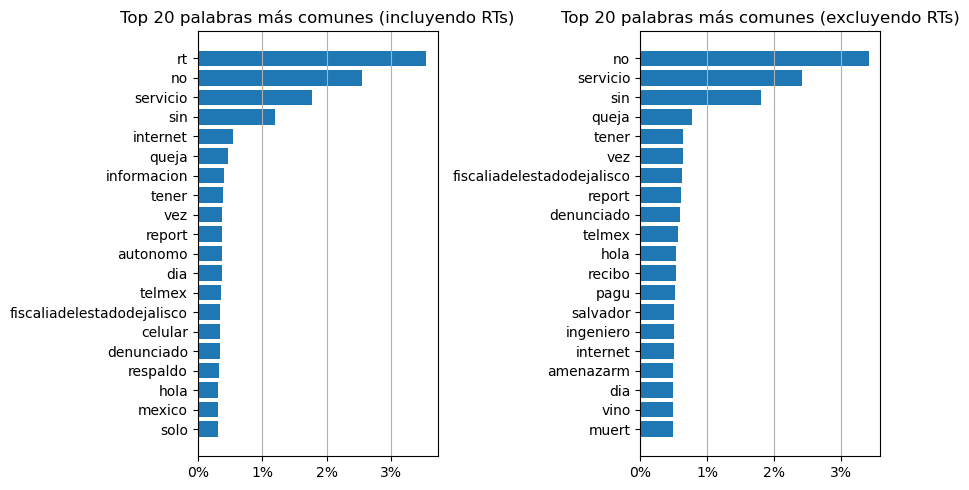

In [9]:
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores como porcentaje
formatter = FuncFormatter(lambda x, pos: f'{x:.0%}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la primera gráfica
axes[0].barh(top_words_per.index[:20], top_words_per.values[:20])
axes[0].set_title("Top 20 palabras más comunes (incluyendo RTs)")
axes[0].invert_yaxis()  # Voltear en espejo
axes[0].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

axes[1].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la segunda gráfica
axes[1].barh(top_words_nort_per.index[:20][::-1], top_words_nort_per.values[:20][::-1])
axes[1].set_title("Top 20 palabras más comunes (excluyendo RTs)")
axes[1].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

plt.tight_layout()
plt.show()

In [10]:
tweets = tweets[tweets["RT"] == 0][tweets["Cleaned"]!=""][tweets["len"]>=3].sample(frac=0.25, random_state=42)
tweets = tweets.drop_duplicates(subset=["Cleaned"])

In [11]:
len(tweets) #13347

10380

# Clustering

## Tokenize

In [12]:
tweets["Token"] = tweets.Cleaned.str.split()
tweets.head()

,User,Tweet,Link,Date,id,RT,Cleaned,len,Token
64391,@Josh72654668,"Buen día, el @IFT_MX está para atenderte, si q...",https://twitter.com/Josh72654668/status/173969...,"December 26, 2023 at 11:18AM","@Josh72654668December 26, 2023 at 11:18AM",0,buen dia atendert quier generar report acced v...,11,"[buen, dia, atendert, quier, generar, report, ..."
101855,@salomonpadilla,@erickenredes @lopezobrador_ @IFT_MX De acuerd...,https://twitter.com/salomonpadilla/status/1632...,"March 06, 2023 at 08:14PM","@salomonpadillaMarch 06, 2023 at 08:14PM",0,acuerdo aunqu no creo tema falta conocimiento ...,11,"[acuerdo, aunqu, no, creo, tema, falta, conoci..."
87630,@isai7729,@Megacable @Profeco @IFT_MX y lo peor es que m...,https://twitter.com/isai7729/status/1782974887...,"April 23, 2024 at 09:28PM","@isai7729April 23, 2024 at 09:28PM",0,peor cobran llegara internet dicen,5,"[peor, cobran, llegara, internet, dicen]"
83424,@InfoCdMex,@WhiteBxProject @JulioCBonillaG @IFT_MX Con co...,https://twitter.com/InfoCdMex/status/177632859...,"April 05, 2024 at 01:18PM","@InfoCdMexApril 05, 2024 at 01:18PM",0,convenio info cdmx coloca vanguardia frent des...,9,"[convenio, info, cdmx, coloca, vanguardia, fre..."
75020,@terminathor13,@Profeco @IFT_MX me puedes ayudar en un proced...,https://twitter.com/terminathor13/status/17553...,"February 07, 2024 at 02:07PM","@terminathor13February 07, 2024 at 02:07PM",0,pued ayudar procedimiento desbloqueo equipo no...,8,"[pued, ayudar, procedimiento, desbloqueo, equi..."


## Embeddings

In [13]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.preprocessing import normalize

In [14]:
d2v = Doc2Vec(vector_size=30, window=2, min_count=5, workers=-1, epochs=10)

In [15]:
tweets["Tag"] = tweets.apply(lambda x: TaggedDocument(words=x["Token"], tags=[x["id"]]), axis=1)

In [16]:
d2v.build_vocab(tweets["Tag"])
d2v.train(tweets["Tag"], total_examples=d2v.corpus_count, epochs=d2v.epochs)
tweets["Embedding"] = tweets["Tag"].apply(lambda x: d2v.infer_vector(x.words))
# Normalizar columna embeddings con normalize de sklearn
tweets["Embedding"] = tweets["Embedding"].apply(lambda x: normalize(x.reshape(1, -1)))
tweets.head()

,User,Tweet,Link,Date,id,RT,Cleaned,len,Token,Tag,Embedding
64391,@Josh72654668,"Buen día, el @IFT_MX está para atenderte, si q...",https://twitter.com/Josh72654668/status/173969...,"December 26, 2023 at 11:18AM","@Josh72654668December 26, 2023 at 11:18AM",0,buen dia atendert quier generar report acced v...,11,"[buen, dia, atendert, quier, generar, report, ...","([buen, dia, atendert, quier, generar, report,...","[[-0.13970368, 0.18193638, -0.24942918, -0.313..."
101855,@salomonpadilla,@erickenredes @lopezobrador_ @IFT_MX De acuerd...,https://twitter.com/salomonpadilla/status/1632...,"March 06, 2023 at 08:14PM","@salomonpadillaMarch 06, 2023 at 08:14PM",0,acuerdo aunqu no creo tema falta conocimiento ...,11,"[acuerdo, aunqu, no, creo, tema, falta, conoci...","([acuerdo, aunqu, no, creo, tema, falta, conoc...","[[-0.17247388, -0.24140742, 0.023975369, 0.166..."
87630,@isai7729,@Megacable @Profeco @IFT_MX y lo peor es que m...,https://twitter.com/isai7729/status/1782974887...,"April 23, 2024 at 09:28PM","@isai7729April 23, 2024 at 09:28PM",0,peor cobran llegara internet dicen,5,"[peor, cobran, llegara, internet, dicen]","([peor, cobran, llegara, internet, dicen], [@i...","[[-0.09936201, -0.08549479, 0.097220615, -0.28..."
83424,@InfoCdMex,@WhiteBxProject @JulioCBonillaG @IFT_MX Con co...,https://twitter.com/InfoCdMex/status/177632859...,"April 05, 2024 at 01:18PM","@InfoCdMexApril 05, 2024 at 01:18PM",0,convenio info cdmx coloca vanguardia frent des...,9,"[convenio, info, cdmx, coloca, vanguardia, fre...","([convenio, info, cdmx, coloca, vanguardia, fr...","[[-0.23107496, 0.25586057, -0.14440162, 0.2885..."
75020,@terminathor13,@Profeco @IFT_MX me puedes ayudar en un proced...,https://twitter.com/terminathor13/status/17553...,"February 07, 2024 at 02:07PM","@terminathor13February 07, 2024 at 02:07PM",0,pued ayudar procedimiento desbloqueo equipo no...,8,"[pued, ayudar, procedimiento, desbloqueo, equi...","([pued, ayudar, procedimiento, desbloqueo, equ...","[[0.1931772, -0.014417995, 0.035174076, 0.0070..."


In [17]:
d2v.corpus_count

10380

## T-SNE
(Para pre visualizar los datos)

In [18]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(n_components=2, random_state=42,
             n_iter=1000, perplexity=10, init='pca',
             learning_rate=500,
             metric='cosine', n_jobs=-1)
embeddings = np.vstack(tweets.Embedding.to_numpy())
tsne_cord = tsne.fit_transform(embeddings)

In [32]:
tweets["TSNE"] = tsne_cord.tolist()
tweets.head()

,User,Tweet,Link,Date,id,RT,Cleaned,len,Token,Tag,Embedding,TSNE,Cluster
64391,@Josh72654668,"Buen día, el @IFT_MX está para atenderte, si q...",https://twitter.com/Josh72654668/status/173969...,"December 26, 2023 at 11:18AM","@Josh72654668December 26, 2023 at 11:18AM",0,buen dia atendert quier generar report acced v...,11,"[buen, dia, atendert, quier, generar, report, ...","([buen, dia, atendert, quier, generar, report,...","[[-0.13970368, 0.18193638, -0.24942918, -0.313...","[-15.037841796875, -62.32987976074219]",3
101855,@salomonpadilla,@erickenredes @lopezobrador_ @IFT_MX De acuerd...,https://twitter.com/salomonpadilla/status/1632...,"March 06, 2023 at 08:14PM","@salomonpadillaMarch 06, 2023 at 08:14PM",0,acuerdo aunqu no creo tema falta conocimiento ...,11,"[acuerdo, aunqu, no, creo, tema, falta, conoci...","([acuerdo, aunqu, no, creo, tema, falta, conoc...","[[-0.17247388, -0.24140742, 0.023975369, 0.166...","[40.635684967041016, -76.63996124267578]",2
87630,@isai7729,@Megacable @Profeco @IFT_MX y lo peor es que m...,https://twitter.com/isai7729/status/1782974887...,"April 23, 2024 at 09:28PM","@isai7729April 23, 2024 at 09:28PM",0,peor cobran llegara internet dicen,5,"[peor, cobran, llegara, internet, dicen]","([peor, cobran, llegara, internet, dicen], [@i...","[[-0.09936201, -0.08549479, 0.097220615, -0.28...","[5.9560465812683105, 6.798971176147461]",2
83424,@InfoCdMex,@WhiteBxProject @JulioCBonillaG @IFT_MX Con co...,https://twitter.com/InfoCdMex/status/177632859...,"April 05, 2024 at 01:18PM","@InfoCdMexApril 05, 2024 at 01:18PM",0,convenio info cdmx coloca vanguardia frent des...,9,"[convenio, info, cdmx, coloca, vanguardia, fre...","([convenio, info, cdmx, coloca, vanguardia, fr...","[[-0.23107496, 0.25586057, -0.14440162, 0.2885...","[-43.187896728515625, -70.2840347290039]",0
75020,@terminathor13,@Profeco @IFT_MX me puedes ayudar en un proced...,https://twitter.com/terminathor13/status/17553...,"February 07, 2024 at 02:07PM","@terminathor13February 07, 2024 at 02:07PM",0,pued ayudar procedimiento desbloqueo equipo no...,8,"[pued, ayudar, procedimiento, desbloqueo, equi...","([pued, ayudar, procedimiento, desbloqueo, equ...","[[0.1931772, -0.014417995, 0.035174076, 0.0070...","[-33.25007629394531, 76.47753143310547]",0


## Pre visualización

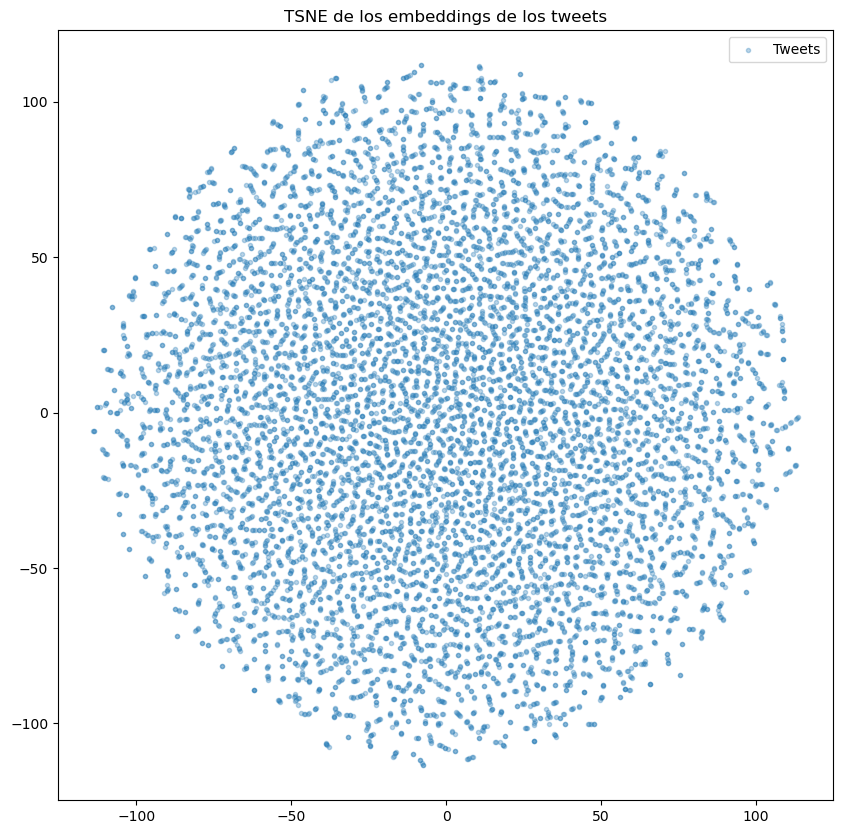

In [33]:
def plot_tsne(tweets):
    pre_vis = np.vstack(tweets[tweets["RT"]==0].TSNE.apply(lambda x: np.array(x)).to_numpy())
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(pre_vis[:, 0], pre_vis[:, 1], alpha=0.3, marker='.', label='Tweets')
    plt.title("TSNE de los embeddings de los tweets")
    # plt.xlim(-15, 15)
    # plt.ylim(-15, 15)
    plt.legend()
    plt.show()

plot_tsne(tweets)

## KMeans

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
#Distancia Coseno (1- similitud)
dist_cos = 1 - cosine_similarity(embeddings)

In [24]:
def cluster_kmeans(data, n_clusters, random_state=42, max_iter=500):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, max_iter=max_iter)
    return kmeans, kmeans.fit_predict(data)

def elbow_method(data, max_k=10):
    distortions = []
    for i in range(1, max_k+1):
        kmeans, _ = cluster_kmeans(data, i)
        distortions.append(kmeans.inertia_)
    return distortions

def print_elbow(distortions):
    plt.plot(range(1, len(distortions)+1), distortions, marker='o')
    plt.title("Método del codo")
    plt.xlabel("Número de clusters")
    plt.ylabel("Distorsión")
    plt.show()


In [25]:
# print_elbow(elbow_method(dist_cos, 7))

In [26]:
model_clust, cluster = cluster_kmeans(dist_cos, 4)
tweets["Cluster"] = cluster

## Visualización

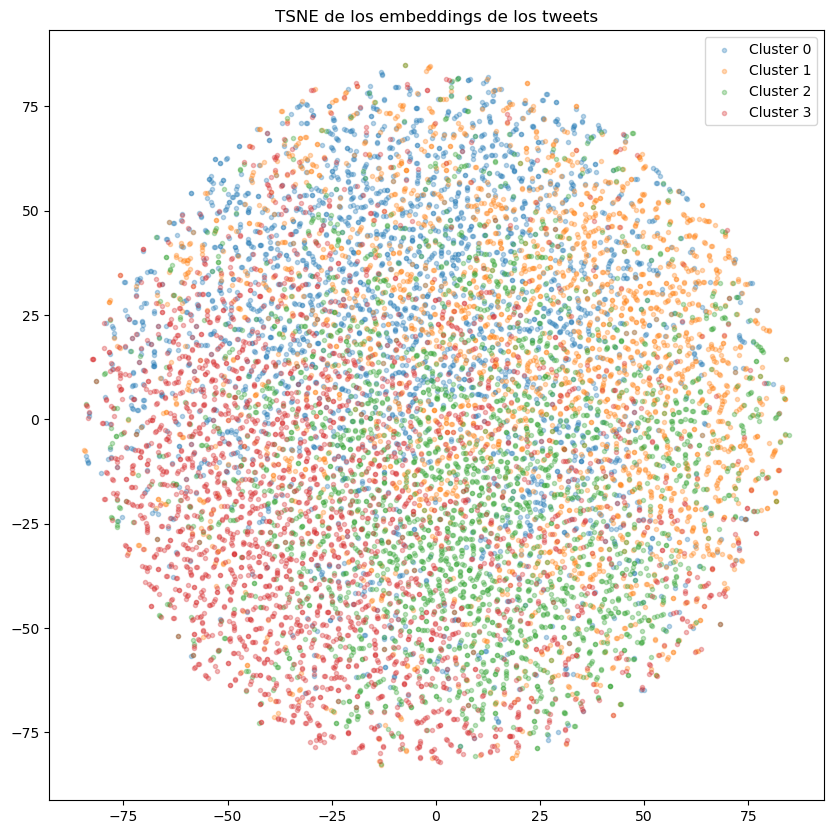

In [27]:
def plot_tsne_clusters(tweets):
    fig = plt.figure(figsize=(10, 10))
    for i in list(set(tweets.Cluster.values.tolist())):
        pre_vis = np.vstack(tweets[tweets["Cluster"]==i].TSNE.apply(lambda x: np.array(x)).to_numpy())
        plt.scatter(pre_vis[:, 0], pre_vis[:, 1], alpha=0.3, marker='.', label=f'Cluster {i}')
    plt.title("TSNE de los embeddings de los tweets")
    # plt.xlim(-15, 15)
    # plt.ylim(-15, 15)
    plt.legend()
    plt.show()

plot_tsne_clusters(tweets)

In [28]:
tweets[tweets["Cluster"]==0].Cleaned.values.tolist()[:10]

['convenio info cdmx coloca vanguardia frent desafio siglo xxi',
 'pued ayudar procedimiento desbloqueo equipo no da solucion',
 'misma solo dicen falla masiva',
 'report celular robado compania telefonica dicen no pueden reportar seguro no paga no padron imei robado puedo',
 'reembolsen dinero ratota izzi pesimo servicio',
 'solucionen problema cada rato quedo sin internet report encargo no pued tal cinismo marcarm cada rato checar servicio dije mal marcan celular luego quieren ayuda pago',
 'acuerdan iba mandar tecnico nada ingres queja correo asesora dio paso pued',
 'hola buen dia favor pido contact liga what app momento presentamo inconvenient via dm apoyemo servicio favor cristinag',
 'medio dia reparar enlac omv inept ocupamo multa inepto usan sin servicio pm report creciendo',
 'hola invitamo presentar queja linea trave plataforma concilianet ingresa']

## DBscan

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
# Aplicar DBSCAN con la matriz de distancias coseno
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed', n_jobs=-1)
labels = dbscan.fit_predict(dist_cos)

ValueError: Negative values in data passed to precomputed distance matrix.

In [ ]:
cosine_similarity(embeddings)

array([[ 1.0000002e+00, -1.1893306e-01, -1.3338779e-01, ...,
        -1.3870546e-01, -1.0736957e-01,  1.1934480e-01],
       [-1.1893306e-01,  9.9999994e-01, -6.9449529e-02, ...,
         2.5532204e-01,  9.6893944e-02,  3.6022589e-02],
       [-1.3338779e-01, -6.9449529e-02,  1.0000001e+00, ...,
         3.2951120e-02,  2.1698192e-04,  5.1008016e-02],
       ...,
       [-1.3870546e-01,  2.5532204e-01,  3.2951120e-02, ...,
         1.0000000e+00,  1.8231821e-01,  9.2904985e-02],
       [-1.0736957e-01,  9.6893944e-02,  2.1698192e-04, ...,
         1.8231821e-01,  9.9999988e-01, -6.7564808e-02],
       [ 1.1934480e-01,  3.6022589e-02,  5.1008016e-02, ...,
         9.2904985e-02, -6.7564808e-02,  1.0000001e+00]], dtype=float32)

In [ ]:
def plot_tsne_dbscan(tweets, labels):
    fig = plt.figure(figsize=(10, 10))
    for i in list(set(labels)):
        pre_vis = np.vstack(tweets[labels==i].TSNE.apply(lambda x: np.array(x)).to_numpy())
        plt.scatter(pre_vis[:, 0], pre_vis[:, 1], alpha=0.3, marker='.', label=f'Cluster {i}')
    plt.title("TSNE de los embeddings de los tweets")
    # plt.xlim(-15, 15)
    # plt.ylim(-15, 15)
    plt.legend()
    plt.show()

plot_tsne_dbscan(tweets, labels)